ASSIGNMENT-1 CS5691
PRATHAM SUNKAD
ME21B145

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the Dataframe

In [2]:
dataframe = pd.read_csv('cm_dataset_2 - cm_dataset.csv')

In [3]:
dataframe

,-1.2061,-2.5268
0,-3.70380,0.33831
1,4.34440,0.96302
2,3.36140,2.94250
3,4.11750,2.15120
4,-3.48000,-2.79970
...,...,...
994,4.95430,-10.04200
995,-0.65809,-14.25900
996,-2.84580,-14.46900
997,-11.17300,-7.40880


In [4]:
dataframe.to_numpy()

array([[ -3.7038 ,   0.33831],
       [  4.3444 ,   0.96302],
       [  3.3614 ,   2.9425 ],
       ...,
       [ -2.8458 , -14.469  ],
       [-11.173  ,  -7.4088 ],
       [ -2.3857 , -13.212  ]])

In [5]:
r1c1 = float(dataframe.columns[0])
r1c2 = float(dataframe.columns[1])
dataset = np.array([[r1c1, r1c2]])
dataset = np.concatenate((dataset, dataframe.to_numpy()))

In [6]:
dataset.shape

(1000, 2)

DEFINING FUNCTIONS

In [7]:
def cal_mean(dataset, z_array, k):
    mean_array = np.zeros((k, 2))
    count_z = np.zeros(k)
    for z in z_array:
        count_z[z-1]+=1
        
    for i in range(len(z_array)):
        mean_array[z_array[i]-1][0] += dataset[i][0]/count_z[z_array[i]-1]
        mean_array[z_array[i]-1][1] += dataset[i][1]/count_z[z_array[i]-1]
        
    return mean_array
    
    

In [8]:
def reassign(dataset, mean_array, z_array):
    for i in range(len(dataset)):
        for j in range(len(mean_array)):
            distance = np.linalg.norm(dataset[i]-mean_array[j])**2
            if j == 0:
                min_distance = distance
                z = j+1
                continue
            if distance < min_distance:
                min_distance = distance
                z = j+1
                
        z_array[i] = z
    return z_array

In [9]:
def cal_error(dataset, mean_array, z_array):
    error = 0
    for i in range(len(dataset)):
        error += np.linalg.norm(dataset[i]-mean_array[z_array[i]-1])**2
    return error

In [10]:
def random_initialize(dataset, k):
    z_array = np.zeros(len(dataset))
    for i in range(len(dataset)):
        z_array[i] = int(np.random.randint(1, k+1))
    return z_array

In [11]:
def seed_initialize(dataset, k):
    np.random.seed(0)
    z_array = np.zeros(len(dataset))
    for i in range(len(dataset)):
        z_array[i] = int(np.random.randint(1, k+1))
    return z_array

In [21]:
def plot_kmeans(dataset, mean_array, z_array, k, error, custom_title=""):
    plt.scatter(dataset[:,0], dataset[:,1], c=z_array, s=5, cmap='viridis')
    for i in range(k):
        plt.scatter(dataset[z_array == (i + 1)][:, 0], dataset[z_array == (i + 1)][:, 1], s=20, label=f'Class {i + 1}')
    plt.scatter(mean_array[:,0], mean_array[:,1], c='black', label='Mean', s=100, marker='x')
    plt.legend()
    plt.title('K-means clustering with k = '+str(k)+' and error = '+str(error)+'\n'+custom_title)
    plt.xlabel('x')
    plt.ylabel('y')

Plotting Error and Clusters for 5 random initializations

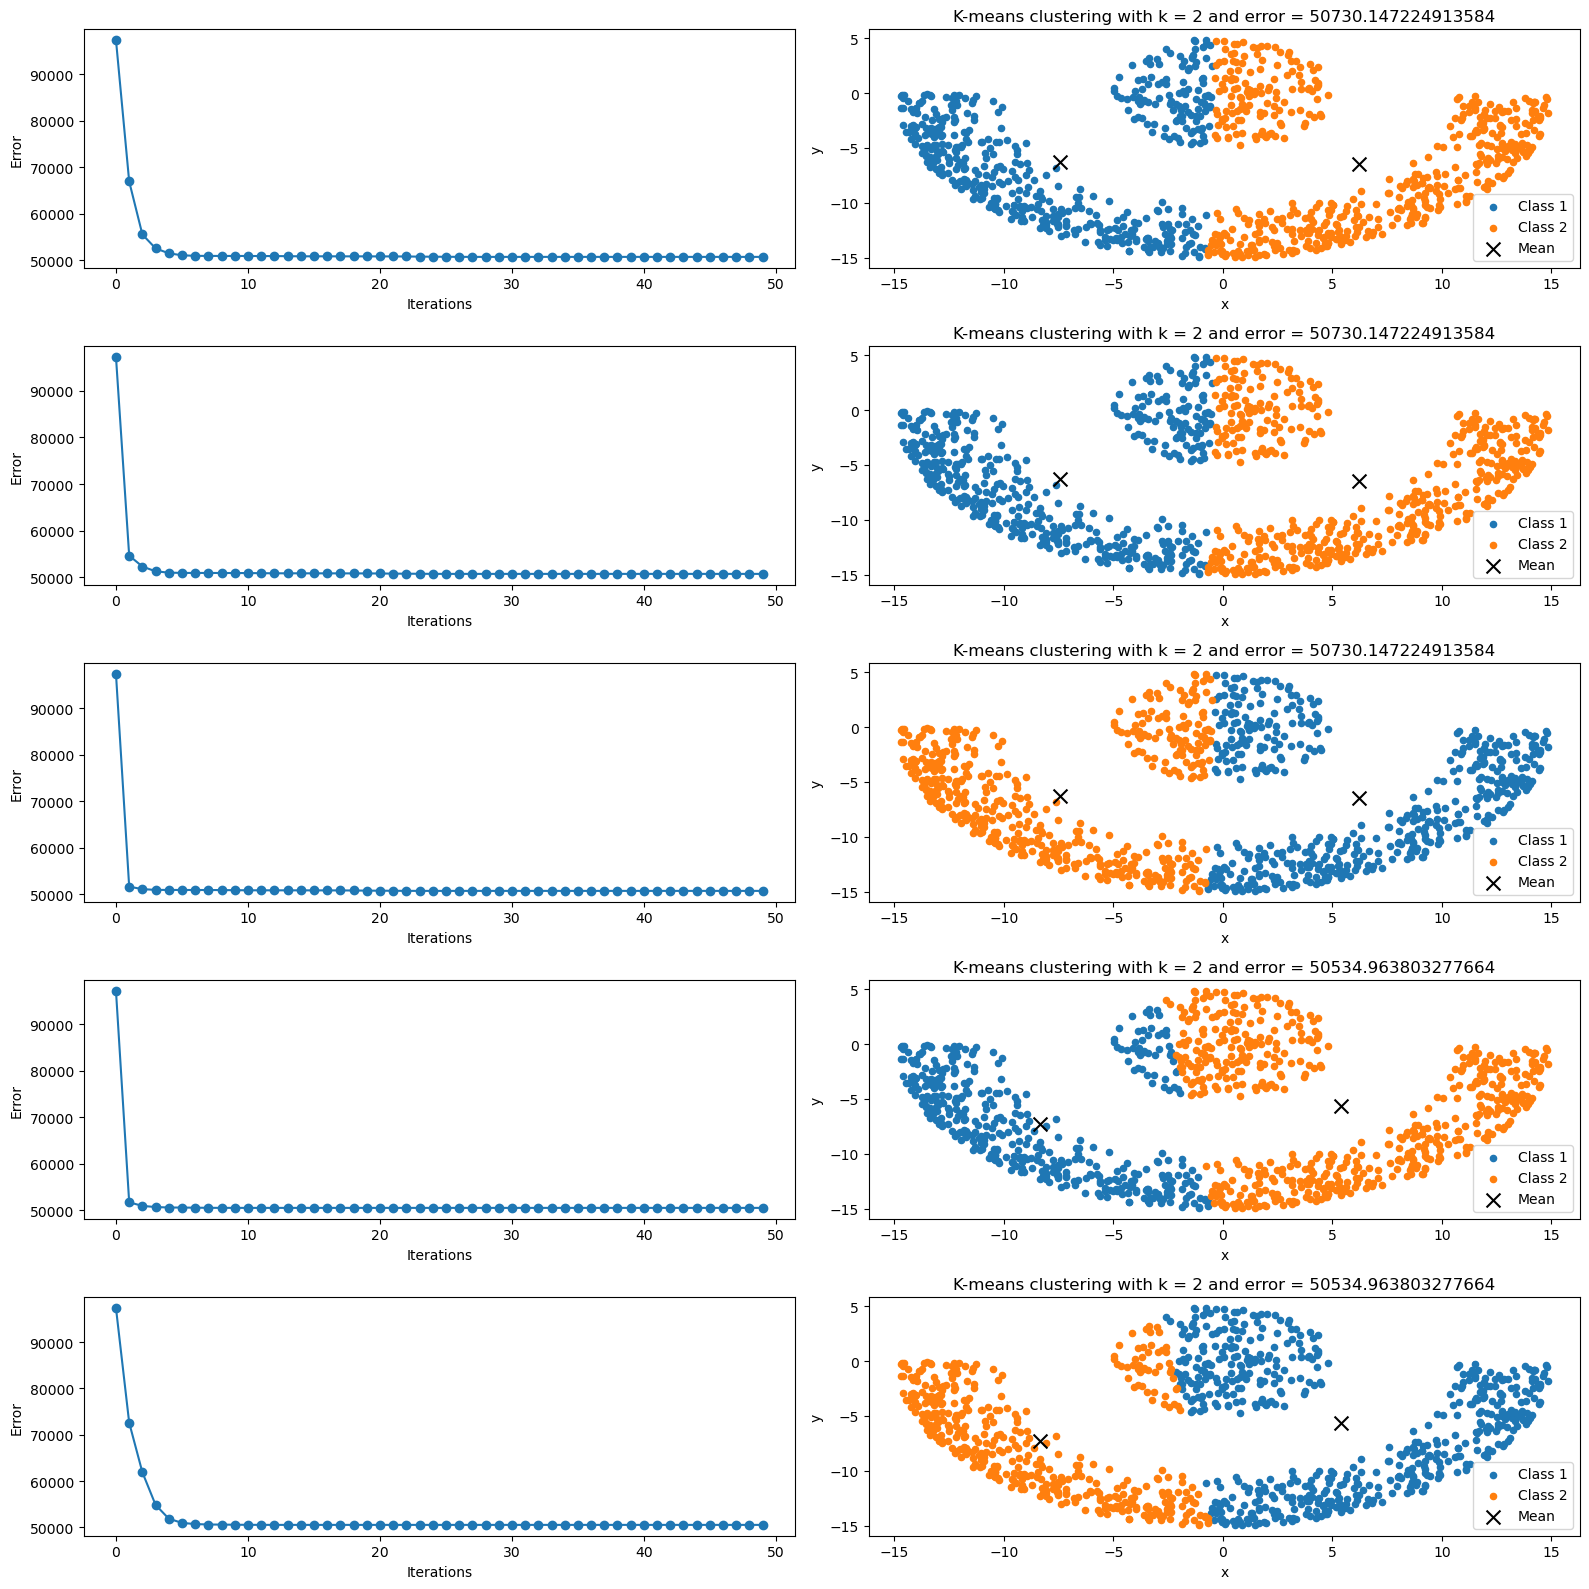

In [18]:
fig = plt.figure(figsize=(16,16))
for num in range(5):
    z_array = np.array(random_initialize(dataset, 2), dtype=int)
    error_array = np.zeros(50)
    for i in range(50):
        mean_array = cal_mean(dataset, z_array, 2)
        error = cal_error(dataset, mean_array, z_array)
        error_array[i] = error
        # reassigning z_array
        z_array = reassign(dataset, mean_array, z_array)
    plt.subplot(5,2,2*num+1)
    plt.plot(error_array, '-o')
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.subplot(5,2,2*num+2)
    plot_kmeans(dataset, mean_array, z_array, 2, error)
    
    # plt.gca().set_aspect('equal', adjustable='box')')
plt.tight_layout()
plt.show()

Plotting Clusters and Vornoi Regions for K = {2,3,4,5}

In [43]:
k_array = [2, 3, 4, 5]

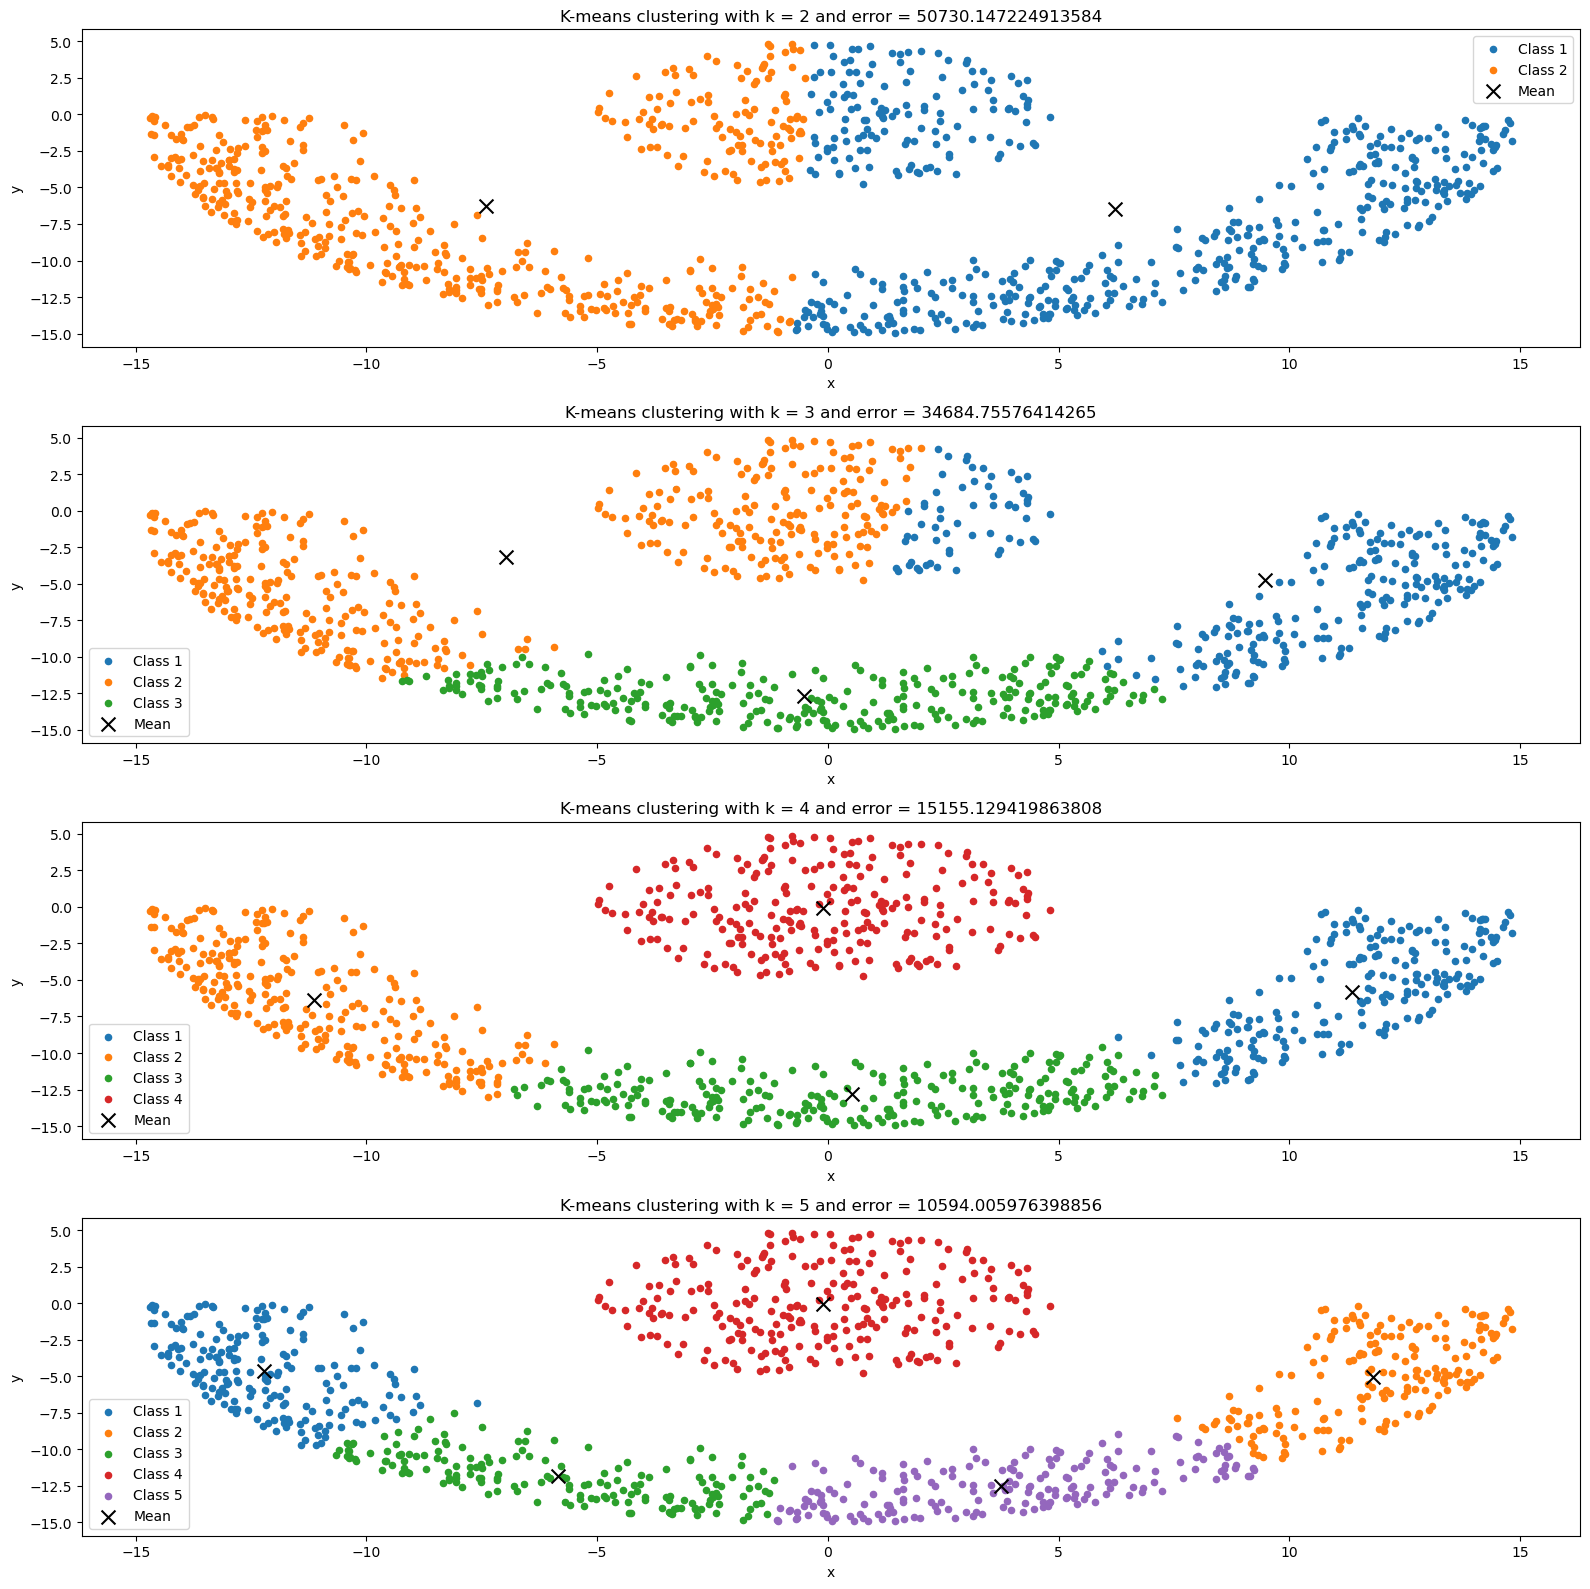

In [20]:
fig = plt.figure(figsize=(16,16))
for j in range(len(k_array)):
    k = k_array[j]
    z_array = np.array(seed_initialize(dataset, k), dtype=int)
    for i in range(50):
        mean_array = cal_mean(dataset, z_array, k)
        error = cal_error(dataset, mean_array, z_array)
        # reassigning z_array
        z_array = reassign(dataset, mean_array, z_array)
    plt.subplot(len(k_array),1,j+1)
    plot_kmeans(dataset, mean_array, z_array, k, error)
plt.tight_layout()
plt.show()

Spectral K-Means Functions

In [13]:
def polynomial_kernel(dataset, p):
    K = np.zeros((dataset.shape[0],dataset.shape[0]))
    for i in range(dataset.shape[0]):
        for j in range(dataset.shape[0]):
            K[i,j] = (1 + np.dot(dataset[i,:], dataset[j,:]))**p 
    return K

In [14]:
def radial_kernel(dataset, sigma):
    K = np.zeros((dataset.shape[0],dataset.shape[0]))
    for i in range(dataset.shape[0]):
        for j in range(dataset.shape[0]):
            K[i,j] = np.exp(-np.linalg.norm(dataset[i,:]-dataset[j,:])**2/(2*sigma**2))
    return K

In [15]:
# to sort the array of eigenvectors and eigenvalues in descending order
def bubble_sort(arr1, arr2):
    n = len(arr1)

    for i in range(n):
        for j in range(0, n - i - 1):
        
            if arr1[j] < arr1[j + 1]:
                arr1[j], arr1[j + 1] = arr1[j + 1], arr1[j]
                for k in range(n):
                    arr2[k,j], arr2[k,j + 1] = arr2[k,j + 1], arr2[k,j]
                
    return arr1, arr2

In [16]:
def cal_eigen(K):
    eigenvalues, eigenvectors = np.linalg.eigh(K)   
    eigenvalues, eigenvectors = bubble_sort(eigenvalues, eigenvectors)
    return eigenvalues, eigenvectors

In [17]:
def spectral_means(eigenvectors, k = 2):
    new_dataset = eigenvectors[:,0:k]
    for i in range(new_dataset.shape[0]):
        new_dataset[i,:] = new_dataset[i,:]/np.linalg.norm(new_dataset[i,:])
    return new_dataset

In [18]:
def kmeans(new_dataset, k = 2):
    z_array = np.array(random_initialize(new_dataset, k), dtype=int)
    error_array = np.zeros(50)
    for i in range(50):
        mean_array = cal_mean(new_dataset, z_array, k)
        error = cal_error(new_dataset, mean_array, z_array)
        error_array[i] = error
        # reassigning z_array
        z_array = reassign(new_dataset, mean_array, z_array)
    return z_array, mean_array, error

In [37]:
def map_back(dataset, z_array):
    mean_array = cal_mean(dataset, z_array, 2)
    error = cal_error(dataset, mean_array, z_array)
    return mean_array, error

In [32]:
def modified_clustering(new_dataset, k = 2):
    z_array = np.zeros(new_dataset.shape[0], dtype=int)
    for j in range(new_dataset.shape[0]):
        max = new_dataset[j,0]
        for i in range(new_dataset.shape[1]):
            if(new_dataset[j,i]>=max):
                max = new_dataset[j,i]
                z_array[j] = i+1
                
    mean_array = cal_mean(new_dataset, z_array, k)
    error = cal_error(new_dataset, mean_array, z_array)
    return z_array, mean_array, error
            

Spectral K Means with polynomial kernels (p = 2,3,4) and radial kernels (sigma = 0.2, 1, 5)

In [51]:
p_array = [2, 3, 4, 0]
sigma_array = [0.2, 1, 5]

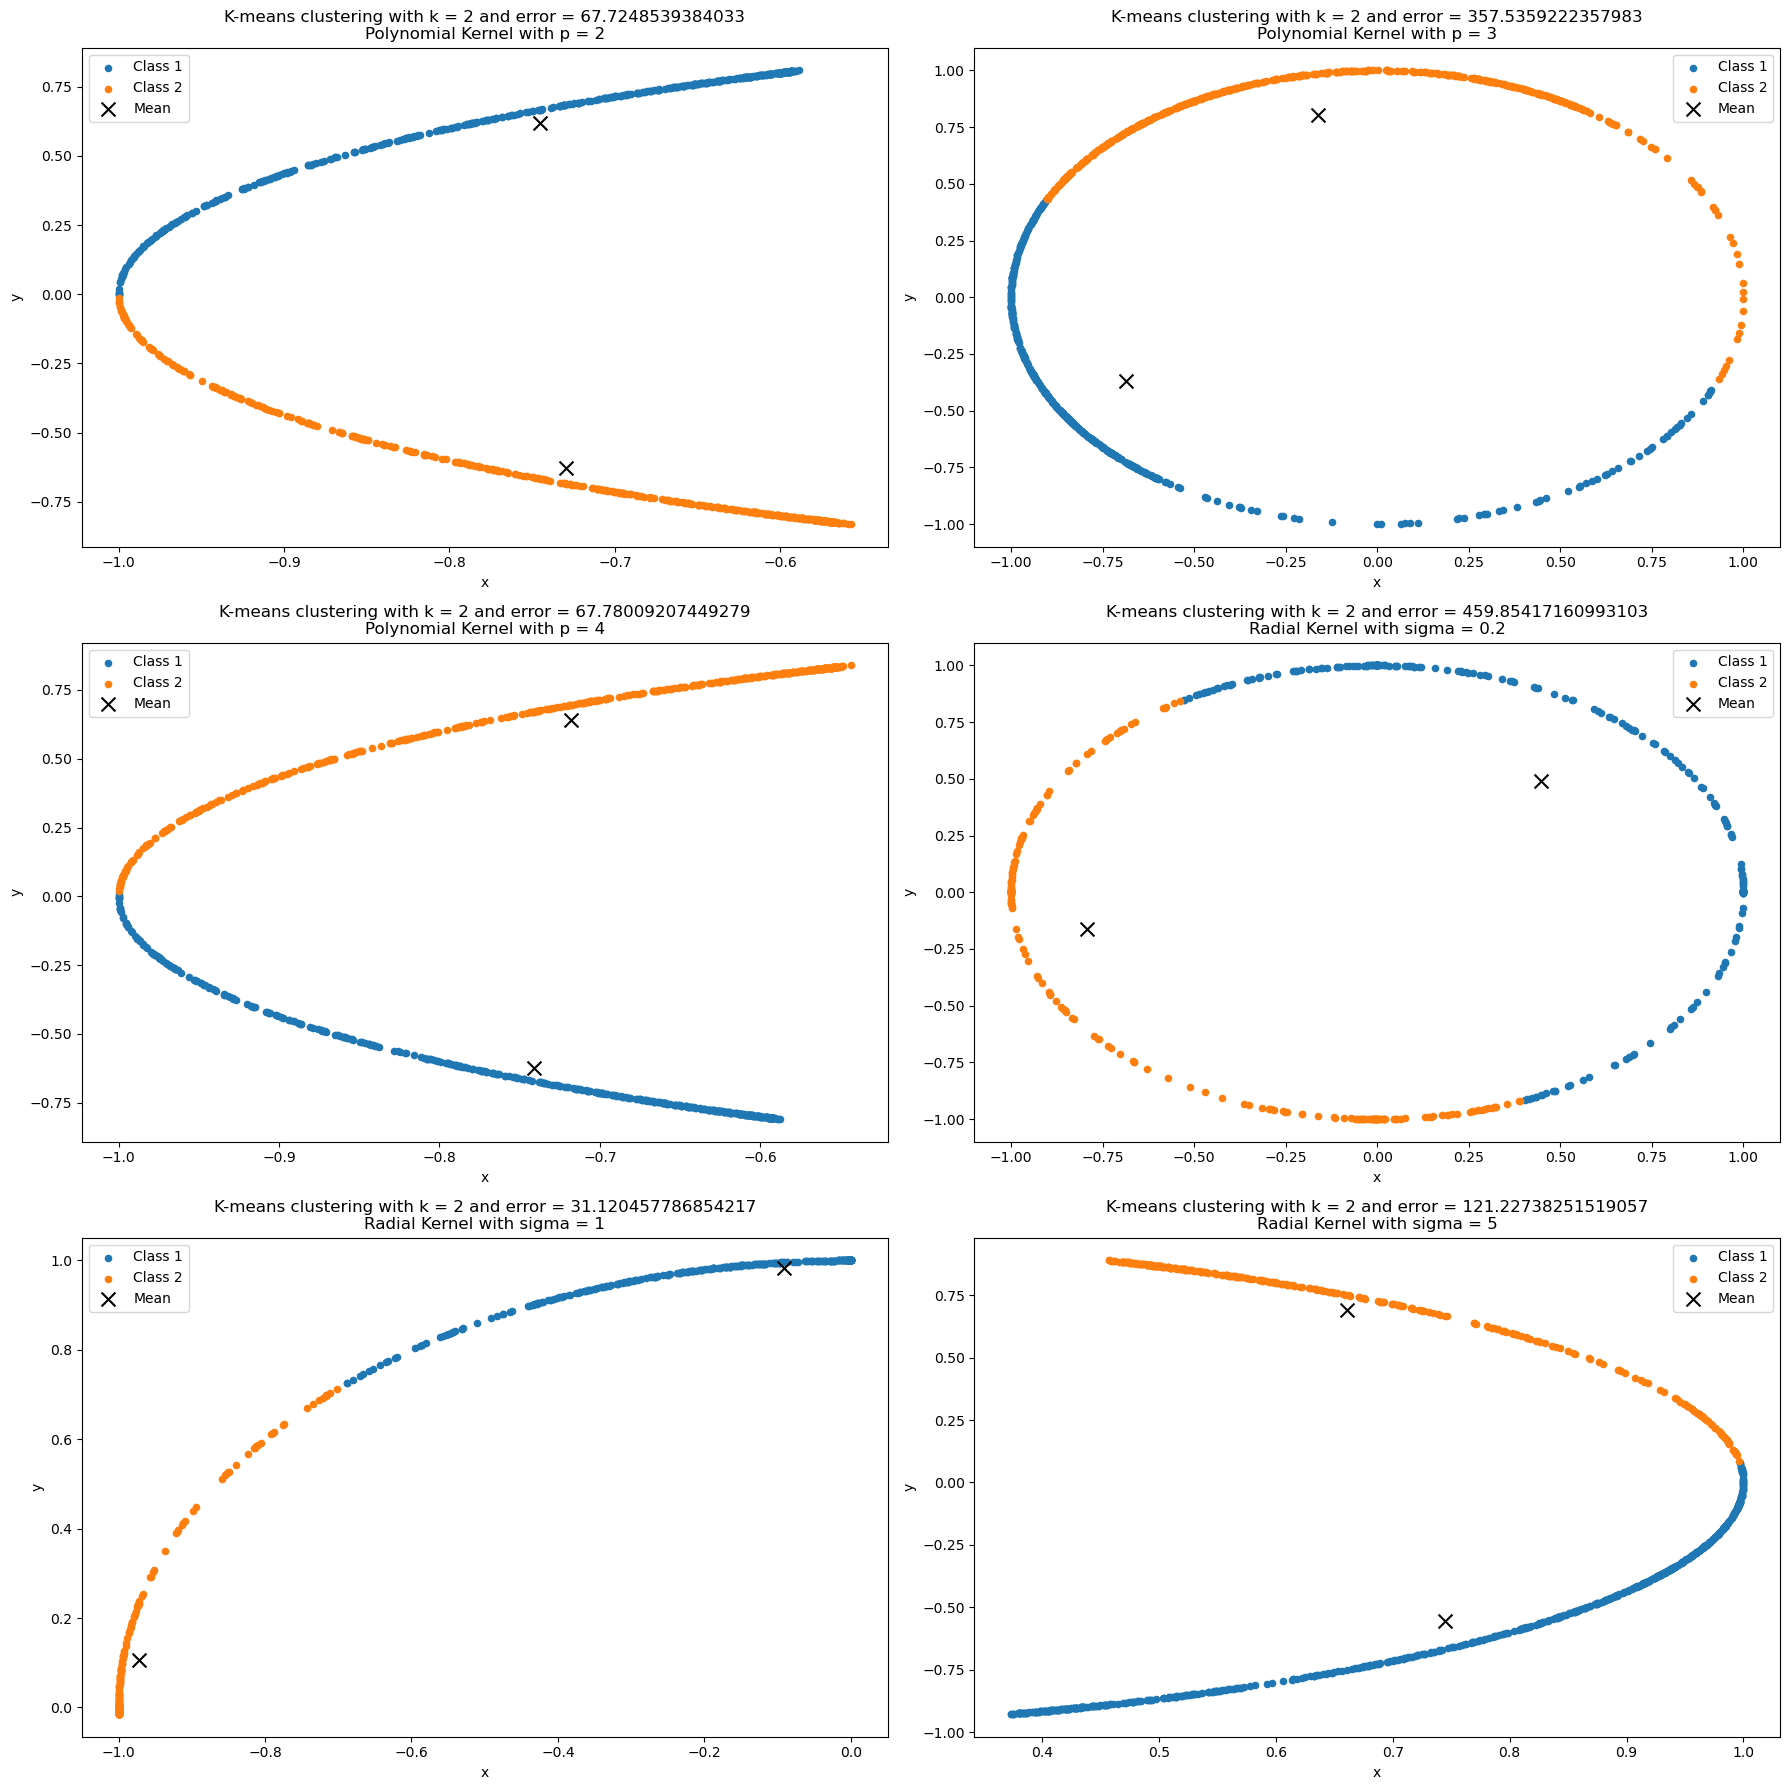

In [30]:
fig = plt.figure(figsize=(18,18))
for j in range(len(p_array)):
    p = p_array[j]
    z_array = np.array(seed_initialize(dataset, 2), dtype=int)
    if(p==0):
        for i in range(len(sigma_array)):
            K_polynomial = radial_kernel(dataset, sigma_array[i])
            eigenvalues, eigenvectors = cal_eigen(K_polynomial)
            spectral_dataset = spectral_means(eigenvectors)
            z_array_spectral, mean_array_spectral, error_spectral = kmeans(spectral_dataset)
            plt.subplot(int((len(p_array)+len(sigma_array)-1)/2),2,j+1+i)
            custom_title = "Radial Kernel with sigma = "+str(sigma_array[i])
            plot_kmeans(spectral_dataset, mean_array_spectral, z_array_spectral, 2, error_spectral, custom_title)
        continue
    K_polynomial = polynomial_kernel(dataset, p)
    eigenvalues, eigenvectors = cal_eigen(K_polynomial)
    spectral_dataset = spectral_means(eigenvectors)
    z_array_spectral, mean_array_spectral, error_spectral = kmeans(spectral_dataset)
    plt.subplot(int((len(p_array)+len(sigma_array)-1)/2),2,j+1)
    custom_title = "Polynomial Kernel with p = "+str(p)
    plot_kmeans(spectral_dataset, mean_array_spectral, z_array_spectral, 2, error_spectral, custom_title)
    
plt.tight_layout()
plt.show()

Clusters Mapped Back to original dataset after Spectral Clustering

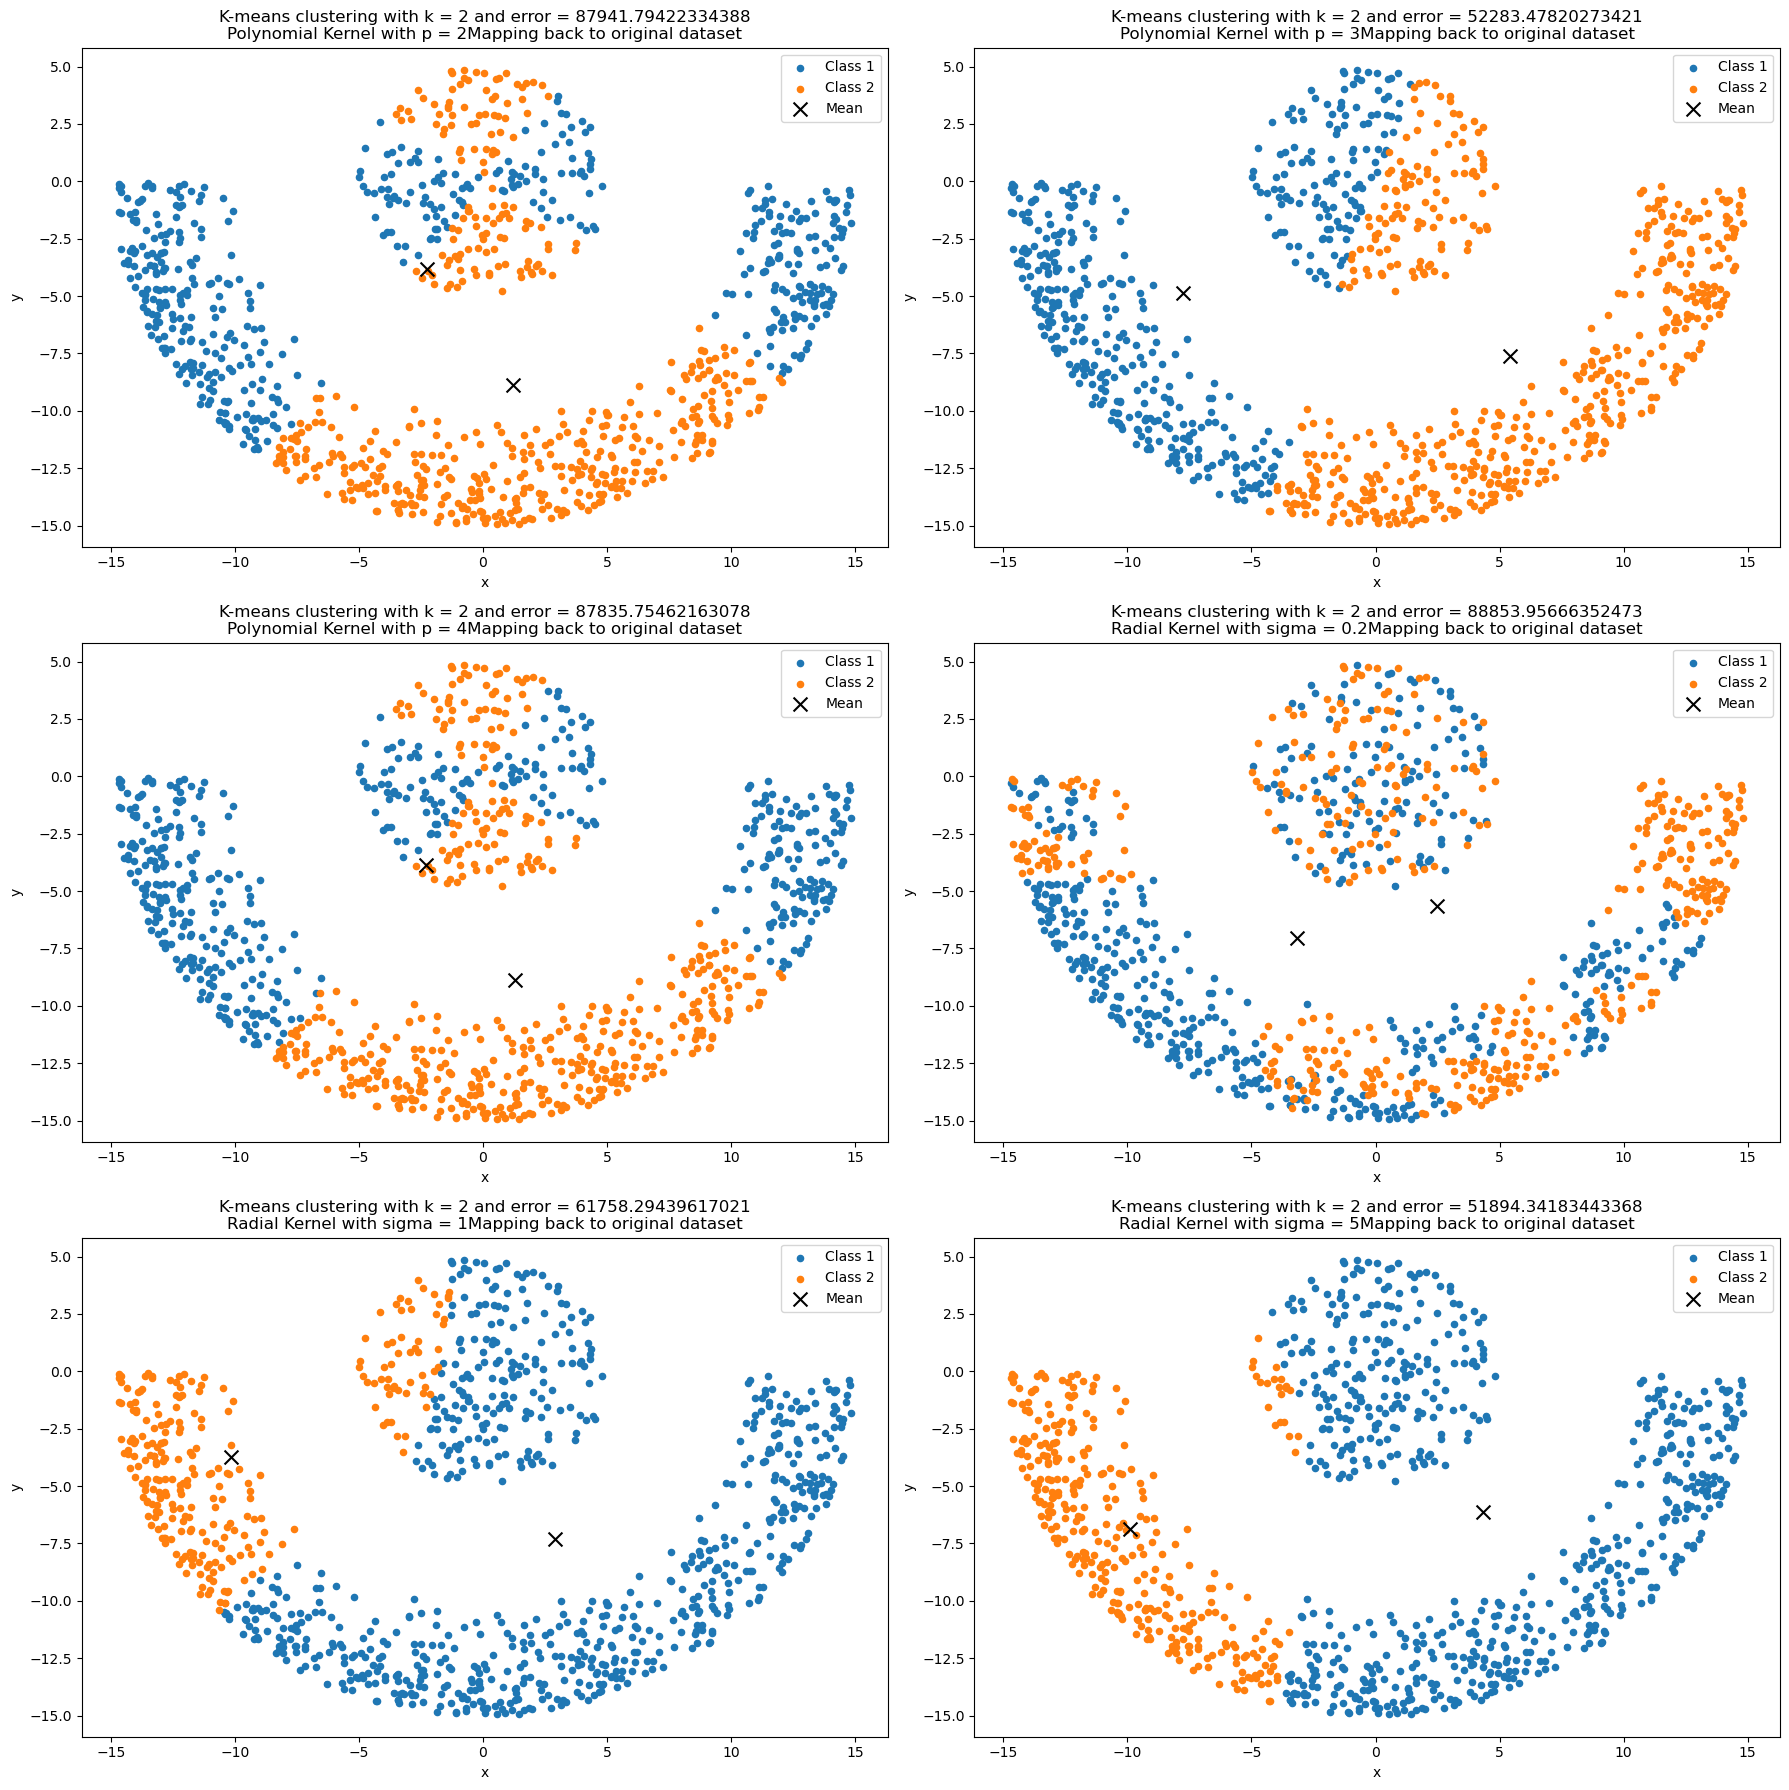

In [52]:
fig = plt.figure(figsize=(18,18))
for j in range(len(p_array)):
    p = p_array[j]
    z_array = np.array(seed_initialize(dataset, 2), dtype=int)
    if(p==0):
        for i in range(len(sigma_array)):
            K_polynomial = radial_kernel(dataset, sigma_array[i])
            eigenvalues, eigenvectors = cal_eigen(K_polynomial)
            spectral_dataset = spectral_means(eigenvectors)
            z_array_spectral, mean_array_spectral, error_spectral = kmeans(spectral_dataset)
            plt.subplot(int((len(p_array)+len(sigma_array)-1)/2),2,j+1+i)
            custom_title = "Radial Kernel with sigma = "+str(sigma_array[i])+"Mapping back to original dataset"
            mean_array, error = map_back(dataset, z_array_spectral)
            plot_kmeans(dataset, mean_array, z_array_spectral, 2, error, custom_title)
        continue
    K_polynomial = polynomial_kernel(dataset, p)
    eigenvalues, eigenvectors = cal_eigen(K_polynomial)
    spectral_dataset = spectral_means(eigenvectors)
    z_array_spectral, mean_array_spectral, error_spectral = kmeans(spectral_dataset)
    plt.subplot(int((len(p_array)+len(sigma_array)-1)/2),2,j+1)
    custom_title = "Polynomial Kernel with p = "+str(p)+"Mapping back to original dataset"
    mean_array, error = map_back(dataset, z_array_spectral)
    plot_kmeans(dataset, mean_array, z_array_spectral, 2, error, custom_title)
    
plt.tight_layout()
plt.show()

KMeans on the modified clustering algorithm

In [49]:
p_array = [2, 3, 4, 0]
sigma_array = [0.2, 1, 5]

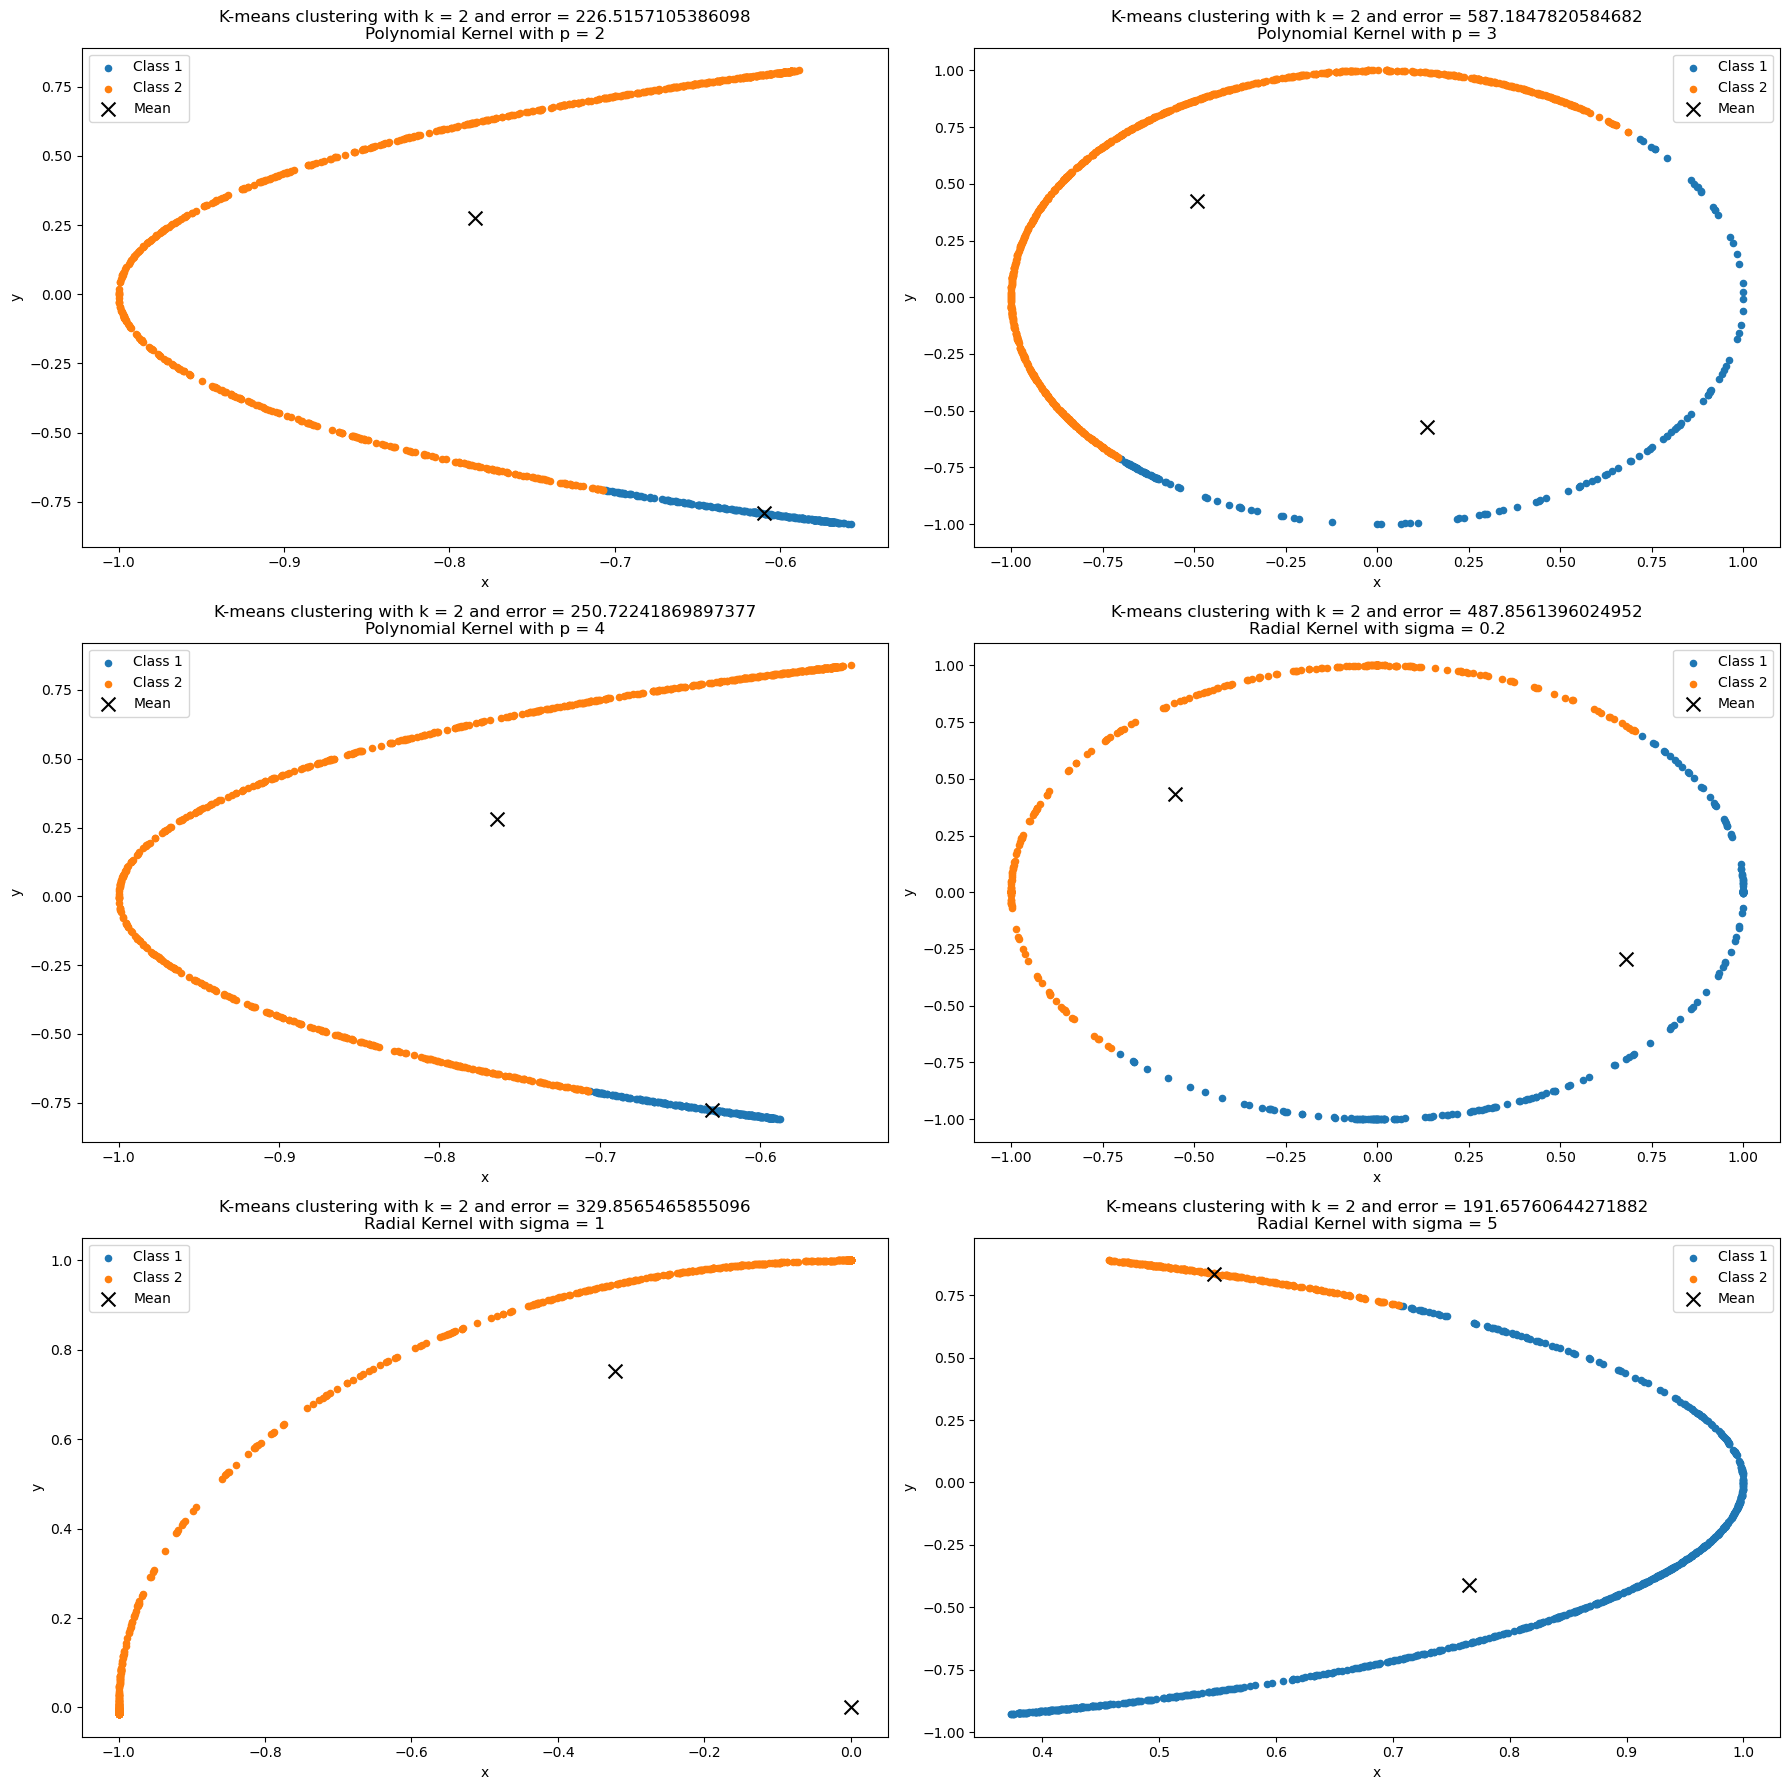

In [36]:
fig = plt.figure(figsize=(18,18))
for j in range(len(p_array)):
    p = p_array[j]
    z_array = np.array(seed_initialize(dataset, 2), dtype=int)
    if(p==0):
        for i in range(len(sigma_array)):
            K_polynomial = radial_kernel(dataset, sigma_array[i])
            eigenvalues, eigenvectors = cal_eigen(K_polynomial)
            spectral_dataset = spectral_means(eigenvectors)
            z_array_spectral, mean_array_spectral, error_spectral = modified_clustering(spectral_dataset)
            plt.subplot(int((len(p_array)+len(sigma_array)-1)/2),2,j+1+i)
            custom_title = "Radial Kernel with sigma = "+str(sigma_array[i])
            plot_kmeans(spectral_dataset, mean_array_spectral, z_array_spectral, 2, error_spectral, custom_title)
        continue
    K_polynomial = polynomial_kernel(dataset, p)
    eigenvalues, eigenvectors = cal_eigen(K_polynomial)
    spectral_dataset = spectral_means(eigenvectors)
    z_array_spectral, mean_array_spectral, error_spectral = modified_clustering(spectral_dataset)
    plt.subplot(int((len(p_array)+len(sigma_array)-1)/2),2,j+1)
    custom_title = "Polynomial Kernel with p = "+str(p)
    plot_kmeans(spectral_dataset, mean_array_spectral, z_array_spectral, 2, error_spectral, custom_title)
    
plt.tight_layout()
plt.show()

Clusters Mapped Back to original dataset after Modified Clustering Algorithm

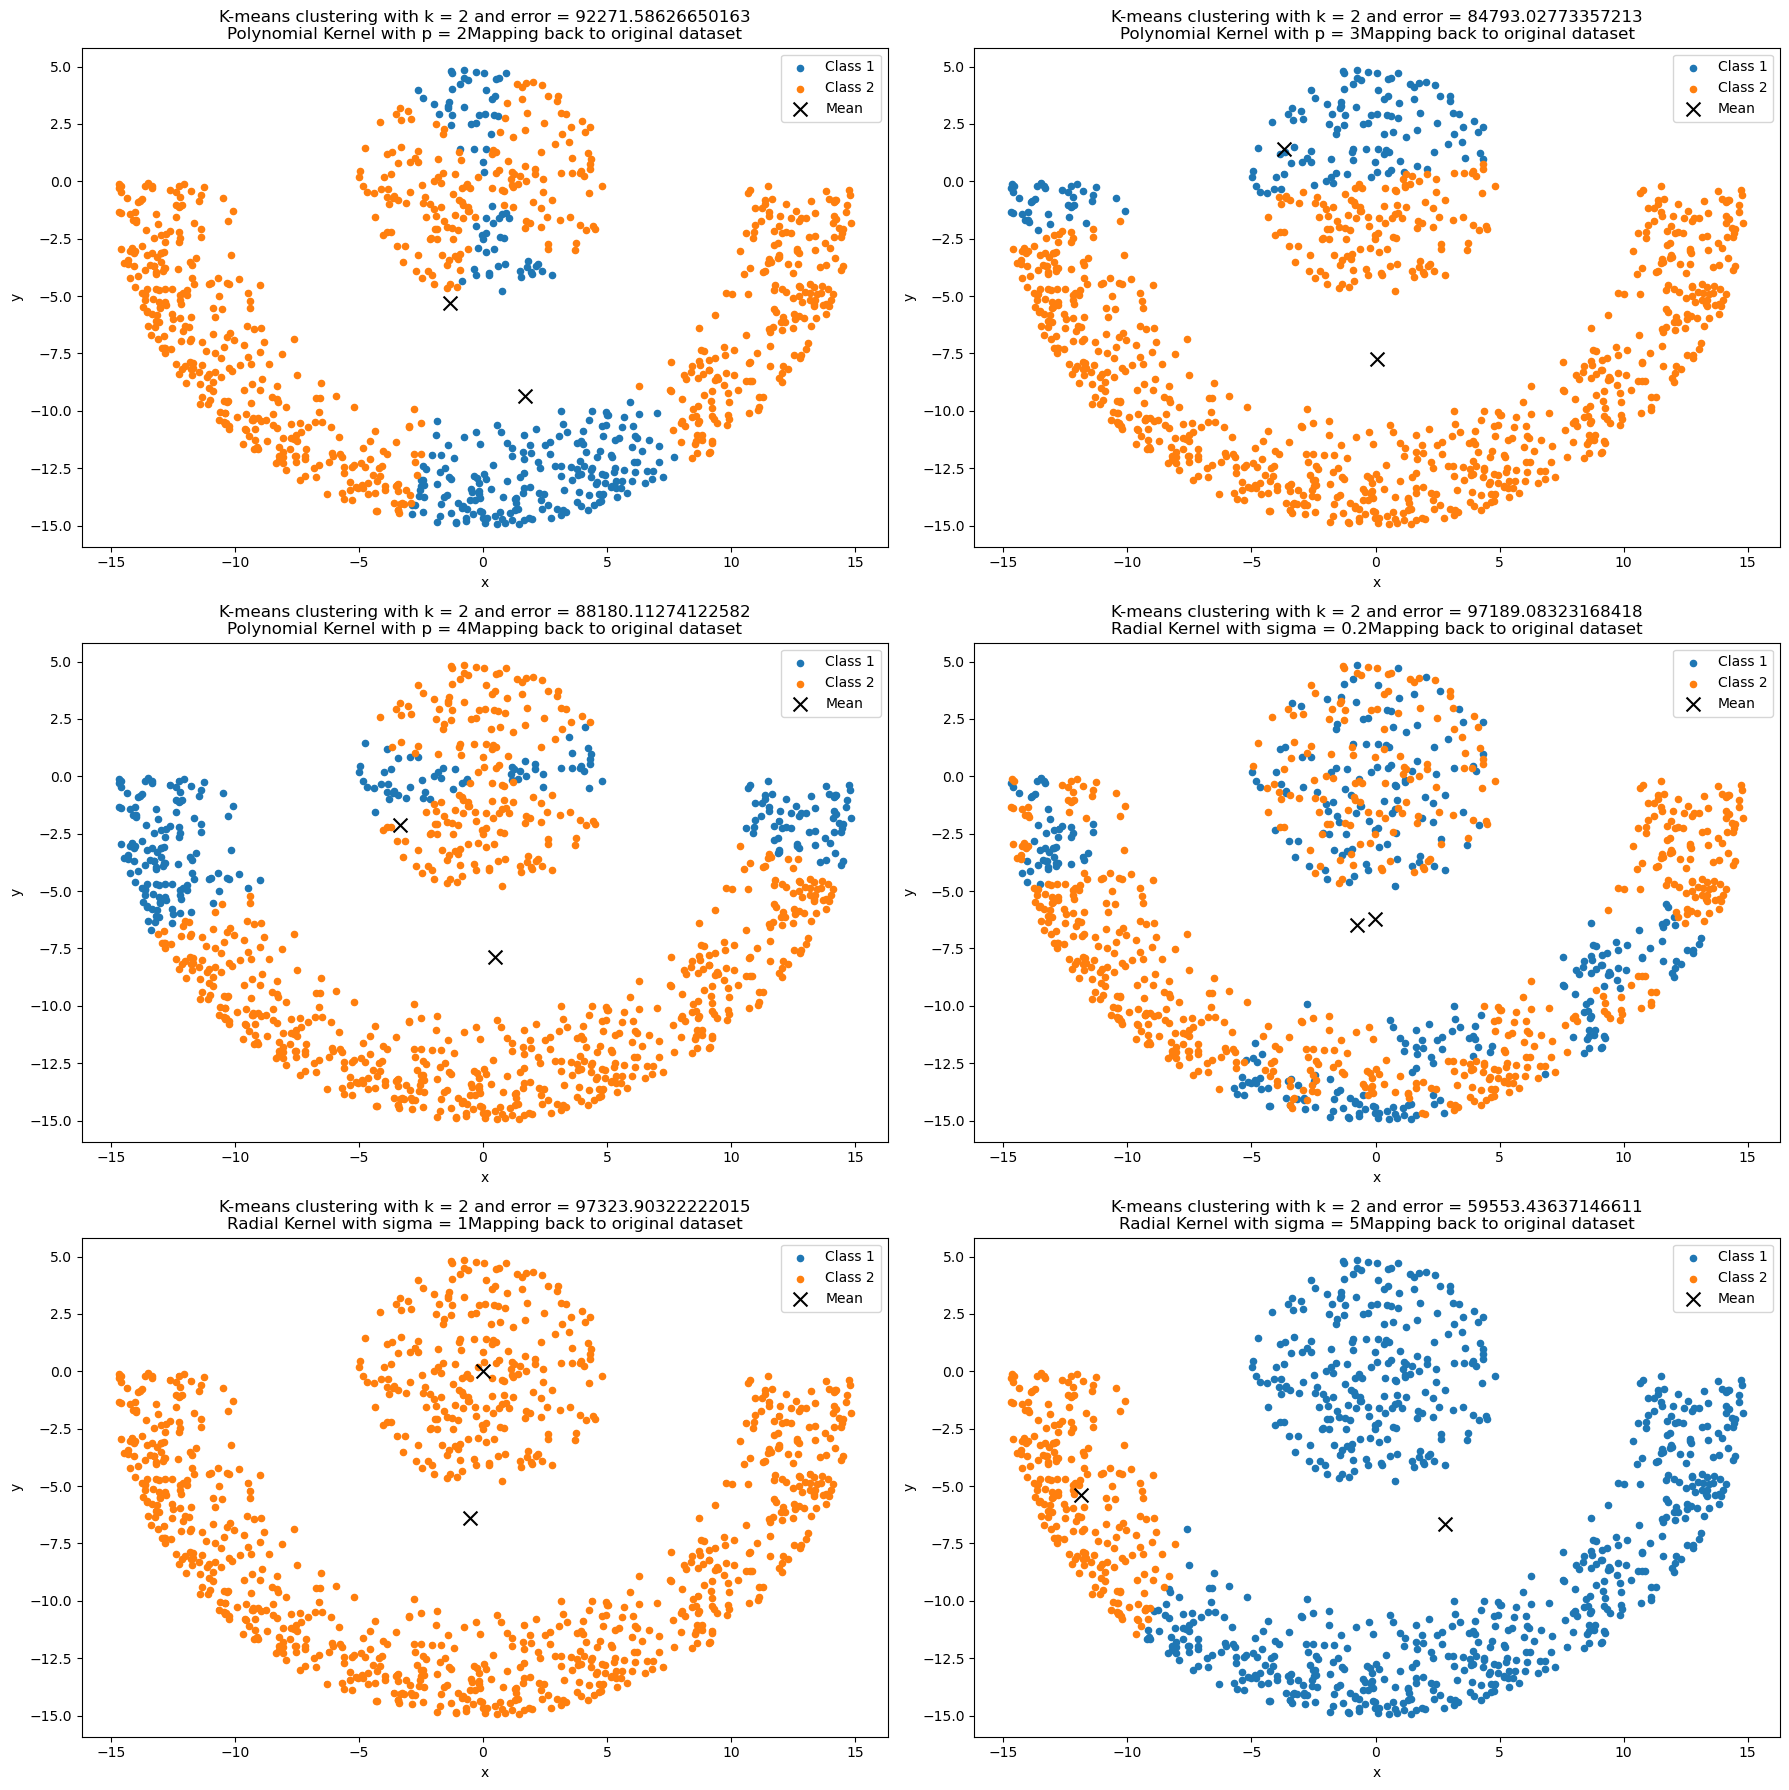

In [50]:
fig = plt.figure(figsize=(18,18))
for j in range(len(p_array)):
    p = p_array[j]
    z_array = np.array(seed_initialize(dataset, 2), dtype=int)
    if(p==0):
        for i in range(len(sigma_array)):
            K_polynomial = radial_kernel(dataset, sigma_array[i])
            eigenvalues, eigenvectors = cal_eigen(K_polynomial)
            spectral_dataset = spectral_means(eigenvectors)
            z_array_spectral, mean_array_spectral, error_spectral = modified_clustering(spectral_dataset)
            plt.subplot(int((len(p_array)+len(sigma_array)-1)/2),2,j+1+i)
            custom_title = "Radial Kernel with sigma = "+str(sigma_array[i])+"Mapping back to original dataset"
            mean_array, error = map_back(dataset, z_array_spectral)
            plot_kmeans(dataset, mean_array, z_array_spectral, 2, error, custom_title)
        continue
    K_polynomial = polynomial_kernel(dataset, p)
    eigenvalues, eigenvectors = cal_eigen(K_polynomial)
    spectral_dataset = spectral_means(eigenvectors)
    z_array_spectral, mean_array_spectral, error_spectral = modified_clustering(spectral_dataset)
    plt.subplot(int((len(p_array)+len(sigma_array)-1)/2),2,j+1)
    custom_title = "Polynomial Kernel with p = "+str(p)+"Mapping back to original dataset"
    mean_array, error = map_back(dataset, z_array_spectral)
    plot_kmeans(dataset, mean_array, z_array_spectral, 2, error, custom_title)
    
plt.tight_layout()
plt.show()